In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# uyarıları kapatma
import warnings

In [2]:
warnings.filterwarnings("ignore")

# veriyi içeri aktarma
veri = pd.read_csv("athlete_events.csv")
veri.head()
# veri hakkında genel bilgi
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
# verinin temizlenmesi
veri.columns
print(veri.columns)

#sütun ismini değiştirme 
veri.rename(columns={'ID' : 'id',
                    'Name' : 'isim',
                    'Sex' : 'cinsiyet',
                    'Age' : 'yas',
                    'Height' : 'boy',
                    'Weight' : 'kilo',
                    'Team' : 'takim',
                    'NOC' : 'uok',
                    'Games' : 'oyunlar',
                    'Year' : 'yil',
                    'Season' : 'sezon',
                    'City' : 'sehir',
                    'Sport' : 'spor',
                    'Event' : 'etkinlik',
                    'Medal' : 'madalya', 
                    },inplace = True)
print(veri.columns)
veri.head()


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
Index(['id', 'isim', 'cinsiyet', 'yas', 'boy', 'kilo', 'takim', 'uok',
       'oyunlar', 'yil', 'sezon', 'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')


,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#yararsız verileri çıkarmak (drop)

veri = veri.drop(["id", "oyunlar"], axis = 1)#axis = 1 -> 1 sütun manasında
veri.head()

# kayıp veri yani nan olan veriler -> biz suan ort gore dolduruyoruz
# boy ve kilo için yapacağız

essiz_etkinlik = pd.unique(veri.etkinlik)# etkinlik ort gore doldurucaz
print("eşsiz etkinlik sayısıs: {}".format(len(essiz_etkinlik)))

# her bır etkınlıgı itaretif olarak dolas
# etkinlik özelinde ıle boy ve kılo ort hesapla
# etkinlik özelinde ıle boy ve kılo  değerlerini etkinlik ortalamarına eşitle

veri_gecici = veri.copy() # gercek verıyı bozmamak ıcın

boy_kilo_liste = ["boy", "kilo"]

eşsiz etkinlik sayısıs: 765


In [ ]:
for e in essiz_etkinlik:
    #etkinlik filtresi oluşturalmım
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleme
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    #boy ve kilo için etkinlik ort heszaplama
    for s in boy_kilo_liste:
        #np.round fonk ->ortlamayı yuvarla
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #eğer etkinlik özelinde ort varsa 
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else:#eğer etkinlik özelinde ort varsa ortalamayı hesapla
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
    #etkinlik özelinde kayıp değerleri doldurulmus olan verıyı veri geciicye eşitle
    veri_gecici[etkinlik_filtre] = veri_filtreli
    
#giderilmiş olan gecici veriyi gercek veriye eşitle
veri = veri_gecici.copy()
veri.info() # boy ve kilo sütunlarının kayıp deger sayısı


In [ ]:
# Yas sütunu kayıp verileri doldurma
#yas değişkeninde tanımlı olmayanları bulma

yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("yas ortalaması: {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

#madalya alamayan sporcuları verı setınden cıkarma
madalya_degiskeni = veri["madalya"]
madalyasi_null_olanlar = pd.isnull(madalya_degiskeni).sum()
print("madalyasi olmayanlar {}".format(madalyasi_null_olanlar))

# madalyası olanları ıstıyorum
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

veri = veri[madalya_degiskeni_filtresi]
print(veri.head(5))

veri.info()

#sonradan kulllanmak için veriyi kaydediyoruz
veri.to_csv("olimpiyatlar/athlete_events_temizlenmis.csv", index = False)
 

In [ ]:
# histogram grafıgı fonk 
def plotHistogram(degisken):
    """
       girdi: degisken/sütun ismi
       çıktı: ilgili degiskenin histokramı
        
     """
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "orange" ) # 85 aralık
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri sıklığı - {}".format(degisken))
    plt.show()

sayisal_degisken = ["yas", "boy", "kilo","yil"]
for i in sayisal_degisken:
    plotHistogram(i)

In [8]:
# her bır etkınlıgı itaretif olarak dolas
# etkinlik özelinde ıle boy ve kılo ort hesapla
# etkinlik özelinde ıle boy ve kılo  değerlerini etkinlik ortalamarına eşitle

veri_gecici = veri.copy() # gercek verıyı bozmamak ıcın

boy_kilo_liste = ["boy", "kilo"]
for e in essiz_etkinlik:
    #etkinlik filtresi oluşturalmım
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleme
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    #boy ve kilo için etkinlik ort heszaplama
    for s in boy_kilo_liste:
        #np.round fonk ->ortlamayı yuvarla
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #eğer etkinlik özelinde ort varsa 
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else:#eğer etkinlik özelinde ort varsa ortalamayı hesapla
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
    #etkinlik özelinde kayıp değerleri doldurulmus olan verıyı veri geciicye eşitle
    veri_gecici[etkinlik_filtre] = veri_filtreli
    
#giderilmiş olan gecici veriyi gercek veriye eşitle
veri = veri_gecici.copy()
veri.info() # boy ve kilo sütunlarının kayıp deger sayısı

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [9]:
# Yas sütunu kayıp verileri doldurma
#yas değişkeninde tanımlı olmayanları bulma

yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("yas ortalaması: {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

#madalya alamayan sporcuları verı setınden cıkarma
madalya_degiskeni = veri["madalya"]
madalyasi_null_olanlar = pd.isnull(madalya_degiskeni).sum()
print("madalyasi olmayanlar {}".format(madalyasi_null_olanlar))

# madalyası olanları ıstıyorum
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

veri = veri[madalya_degiskeni_filtresi]
print(veri.head(5))

veri.info()

#sonradan kulllanmak için veriyi kaydediyoruz
veri.to_csv("olimpiyatlar/athlete_events_temizlenmis.csv", index = False)

yas ortalaması: 25.92
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB
madalyasi olmayanlar 0
                        isim cinsiyet   yas     boy   kilo           takim  \
3       Edgar Lindenau Aabye        M  34.0  182.48  95.62  Denmark/Sweden   
37      Arvo Ossian Aaltonen        M  30.

FileNotFoundError: [Errno 2] No such file or directory: 'olimpiyatlar/athlete_events_temizlenmis.csv'

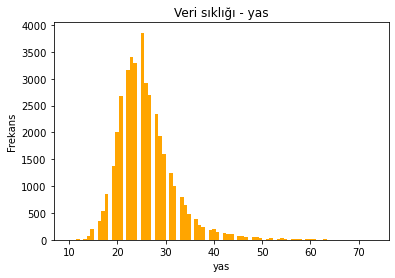

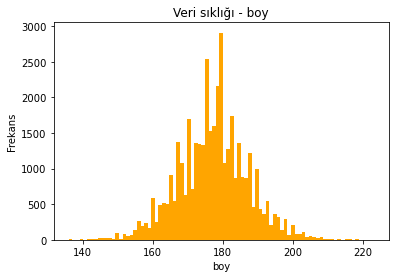

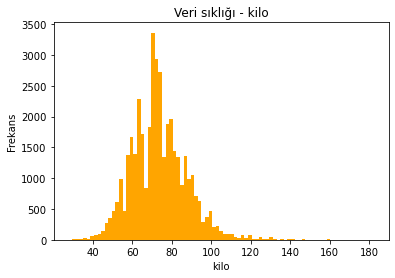

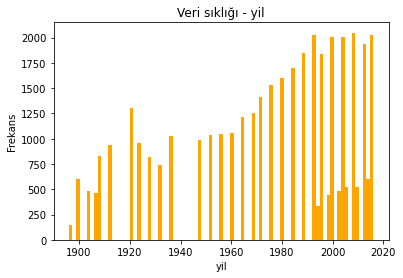

In [10]:
# histogram grafıgı fonk 
def plotHistogram(degisken):
    """
       girdi: degisken/sütun ismi
       çıktı: ilgili degiskenin histokramı
        
     """
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "orange" ) # 85 aralık
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri sıklığı - {}".format(degisken))
    plt.show()

sayisal_degisken = ["yas", "boy", "kilo","yil"]
for i in sayisal_degisken:
    plotHistogram(i)

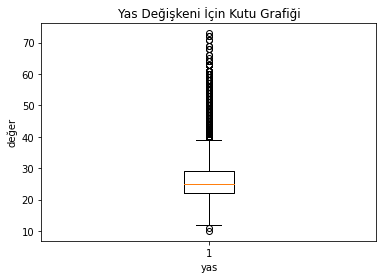

In [11]:
veri.describe()

#kutu grafıgı
plt.boxplot(veri.yas)
plt.title("Yas Değişkeni İçin Kutu Grafiği")
plt.xlabel("yas")
plt.ylabel("değer")
plt.show()


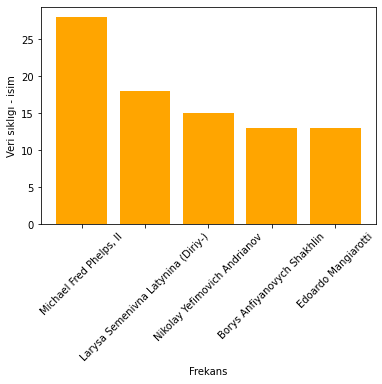

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Borys Anfiyanovych Shakhlin           13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


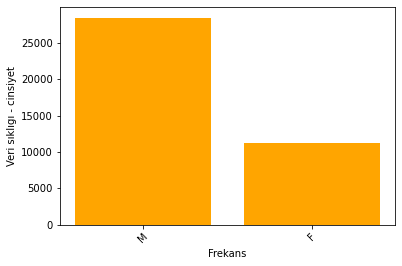

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


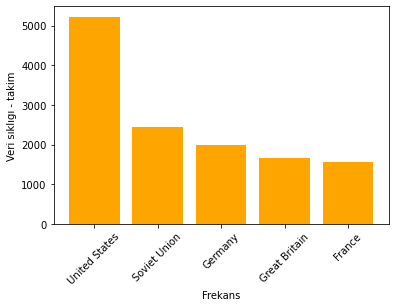

takim: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


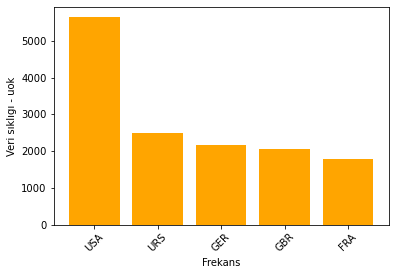

uok: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


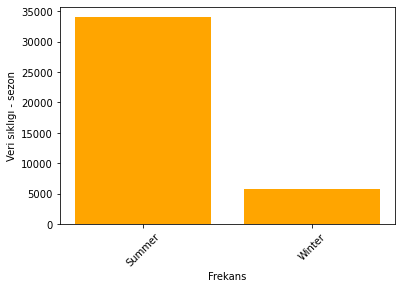

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


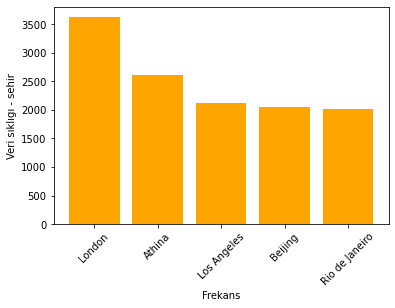

sehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


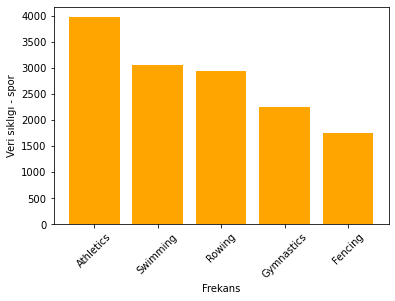

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


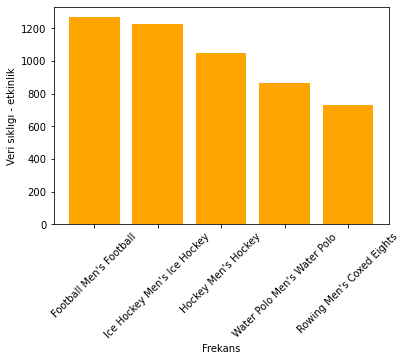

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


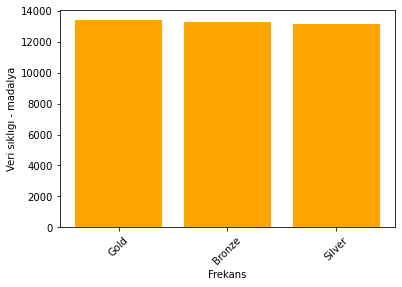

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64
                    isim cinsiyet   yas     boy   kilo           takim  uok  \
3   Edgar Lindenau Aabye        M  34.0  182.48  95.62  Denmark/Sweden  DEN   
37  Arvo Ossian Aaltonen        M  30.0  182.01  76.69         Finland  FIN   
38  Arvo Ossian Aaltonen        M  30.0  177.00  75.00         Finland  FIN   

     yil   sezon      sehir        spor  \
3   1900  Summer      Paris  Tug-Of-War   
37  1920  Summer  Antwerpen    Swimming   
38  1920  Summer  Antwerpen    Swimming   

                                  etkinlik madalya  
3              Tug-Of-War Men's Tug-Of-War    Gold  
37  Swimming Men's 200 metres Breaststroke  Bronze  
38  Swimming Men's 400 metres Breaststroke  Bronze  


In [12]:

#Katogorik değişkenler ile işlemler
#çubuk grafiği çizme
def plotBar(degisken, n=5):
    """
        girdi: degisken/sütun ismi
            n = gösterilecek essiz deger sayısı
            
        cıktı:çucuk grafıgı
    """
    
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "orange" )
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation = 45)
    plt.xlabel("Frekans")
    plt.ylabel("Veri sıklıgı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))
    
kategorik_degisken = ["isim", "cinsiyet", "takim","uok","sezon","sehir","spor","etkinlik","madalya"]
for i in kategorik_degisken:
    plotBar(i)

#cinsiyete gore boy agırlık karsılastırma
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)
print(erkek.head(3))



In [14]:
#cinsiyete gore boy agırlık karsılastırma
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)
print(erkek.head(3))

                    isim cinsiyet   yas     boy   kilo           takim  uok  \
3   Edgar Lindenau Aabye        M  34.0  182.48  95.62  Denmark/Sweden  DEN   
37  Arvo Ossian Aaltonen        M  30.0  182.01  76.69         Finland  FIN   
38  Arvo Ossian Aaltonen        M  30.0  177.00  75.00         Finland  FIN   

     yil   sezon      sehir        spor  \
3   1900  Summer      Paris  Tug-Of-War   
37  1920  Summer  Antwerpen    Swimming   
38  1920  Summer  Antwerpen    Swimming   

                                  etkinlik madalya  
3              Tug-Of-War Men's Tug-Of-War    Gold  
37  Swimming Men's 200 metres Breaststroke  Bronze  
38  Swimming Men's 400 metres Breaststroke  Bronze  
